In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading the dataset

In [3]:
data = pd.read_excel('COVID-19 Daily.xlsx')
# Display the first few rows
print(data.head())

        Date  Daily Tests  Daily Cases  Daily Recoveries  Daily Deaths
0 2020-02-26          NaN          0.0               NaN           NaN
1 2020-02-27          NaN          NaN               NaN           NaN
2 2020-02-28          NaN          NaN               NaN           NaN
3 2020-02-29          NaN          0.0               NaN           NaN
4 2020-03-01          NaN          NaN               NaN           NaN


## Checking for null values

In [5]:
print(data.isnull().sum())
data['Daily Cases'].fillna(data['Daily Cases'].median(), inplace=True)
data['Daily Deaths'].fillna(data['Daily Deaths'].median(), inplace=True)

Date                 0
Daily Tests         13
Daily Cases         11
Daily Recoveries    15
Daily Deaths        57
dtype: int64


C:\Users\dambr\AppData\Local\Temp\ipykernel_5948\3648237065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Daily Cases'].fillna(data['Daily Cases'].median(), inplace=True)
C:\Users\dambr\AppData\Local\Temp\ipykernel_5948\3648237065.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

## Column Info

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              188 non-null    datetime64[ns]
 1   Daily Tests       175 non-null    float64       
 2   Daily Cases       188 non-null    float64       
 3   Daily Recoveries  173 non-null    float64       
 4   Daily Deaths      188 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.5 KB
None


## Descriptive Statistics

In [9]:
print(data.describe())

                      Date   Daily Tests  Daily Cases  Daily Recoveries  \
count                  188    175.000000   188.000000        173.000000   
mean   2020-05-29 12:00:00  14927.297143  1633.063830       1590.930636   
min    2020-02-26 00:00:00      0.000000     0.000000          0.000000   
25%    2020-04-12 18:00:00   6403.500000   459.750000        172.000000   
50%    2020-05-29 12:00:00  16387.000000   990.000000        677.000000   
75%    2020-07-15 06:00:00  22975.000000  2294.750000       2041.000000   
max    2020-08-31 00:00:00  31681.000000  6825.000000      16813.000000   
std                    NaN   9259.243109  1638.865026       2490.639106   

       Daily Deaths  
count    188.000000  
mean      39.324468  
min        0.000000  
25%       17.000000  
50%       32.000000  
75%       50.000000  
max      153.000000  
std       32.325815  


## Calculating Total Tests

In [11]:
total_tests = data['Daily Tests'].sum()
print(f"Total tests performed till September 01, 2020: {total_tests}")


Total tests performed till September 01, 2020: 2612277.0


## Trend Line Graph for Daily Testing

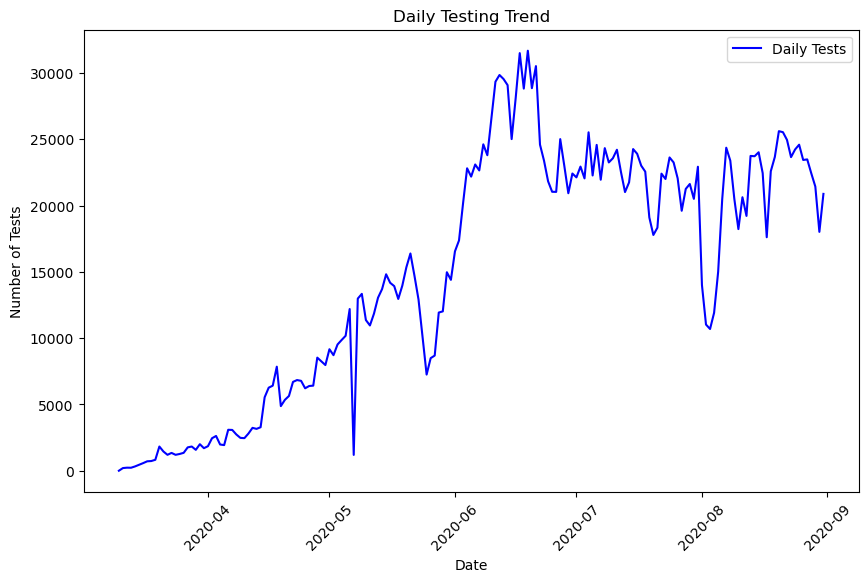

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Daily Tests'], label='Daily Tests', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Daily Testing Trend')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Scatter Diagram for Daily Testing

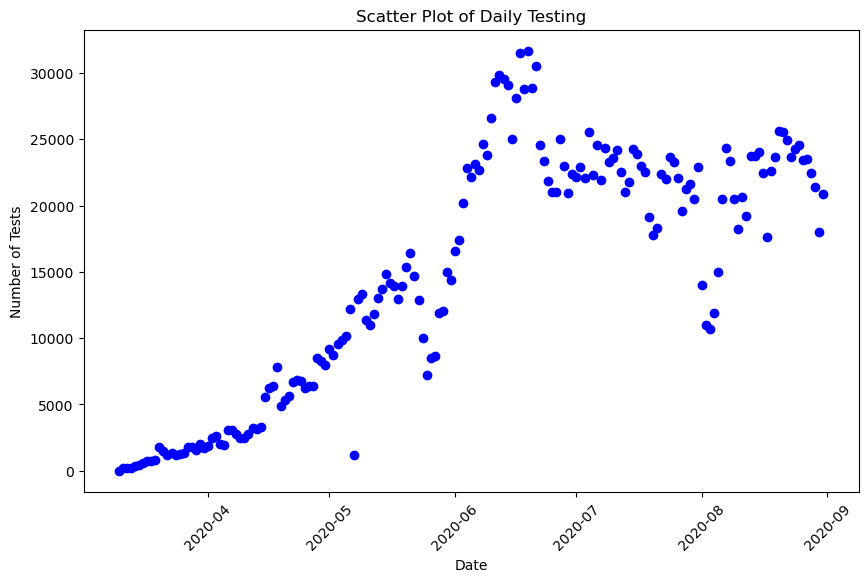

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Daily Tests'], color='b')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Scatter Plot of Daily Testing')
plt.xticks(rotation=45)
plt.show()

## Bar Graph for Daily Testing

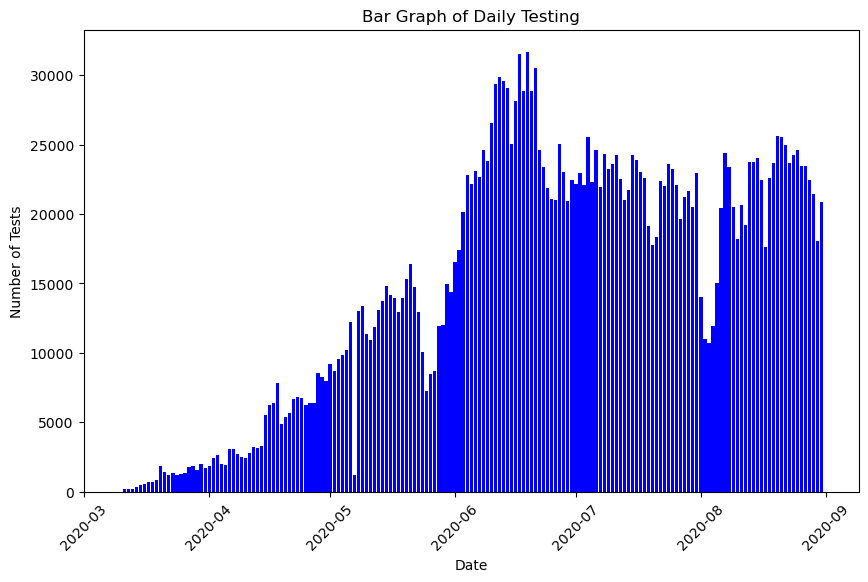

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['Daily Tests'], color='b')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Bar Graph of Daily Testing')
plt.xticks(rotation=45)
plt.show()

## Scatter Plot for Above and Below-Average Daily Testing

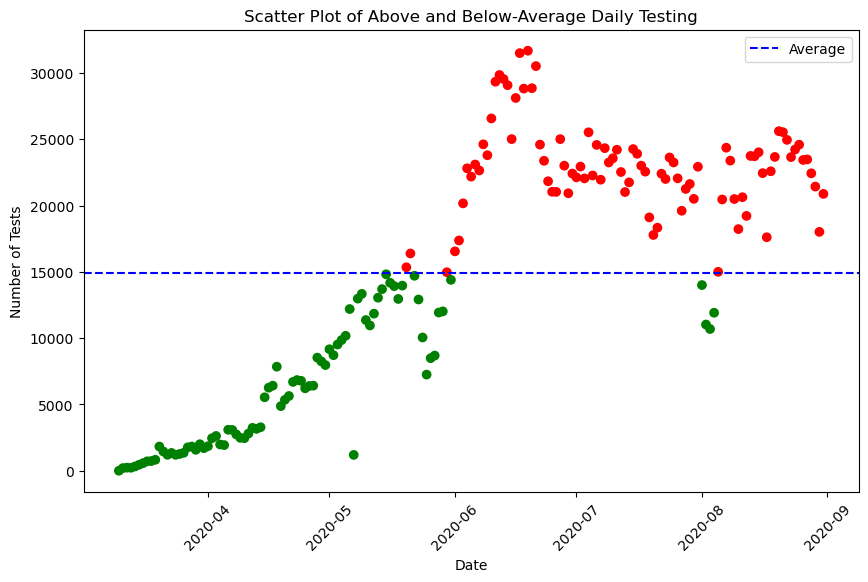

In [19]:
average_test = data['Daily Tests'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Daily Tests'], color=['red' if x > average_test else 'green' for x in data['Daily Tests']])
plt.axhline(average_test, color='blue', linestyle='--', label='Average')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Scatter Plot of Above and Below-Average Daily Testing')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [20]:
# Converting Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Resampling data for weekly and monthly statistics
weekly_data = data.resample('W-Mon', on='Date').sum()
monthly_data = data.resample('M', on='Date').sum()

# Save weekly and monthly data
weekly_data.to_excel('Weekly_COVID_Stats.xlsx')
monthly_data.to_excel('Monthly_COVID_Stats.xlsx')

#  max and min stats for weekly and monthly data
weekly_max_min = {
    'Max Weekly Tests': weekly_data['Daily Tests'].max(),
    'Min Weekly Tests': weekly_data['Daily Tests'].min(),
    'Max Weekly Cases': weekly_data['Daily Cases'].max(),
    'Min Weekly Cases': weekly_data['Daily Cases'].min(),
    'Max Weekly Recoveries': weekly_data['Daily Recoveries'].max(),
    'Min Weekly Recoveries': weekly_data['Daily Recoveries'].min(),
    'Max Weekly Deaths': weekly_data['Daily Deaths'].max(),
    'Min Weekly Deaths': weekly_data['Daily Deaths'].min()
}

monthly_max_min = {
    'Max Monthly Tests': monthly_data['Daily Tests'].max(),
    'Min Monthly Tests': monthly_data['Daily Tests'].min(),
    'Max Monthly Cases': monthly_data['Daily Cases'].max(),
    'Min Monthly Cases': monthly_data['Daily Cases'].min(),
    'Max Monthly Recoveries': monthly_data['Daily Recoveries'].max(),
    'Min Monthly Recoveries': monthly_data['Daily Recoveries'].min(),
    'Max Monthly Deaths': monthly_data['Daily Deaths'].max(),
    'Min Monthly Deaths': monthly_data['Daily Deaths'].min()
}

print('Weekly Max/Min Stats:', weekly_max_min)
print('Monthly Max/Min Stats:', monthly_max_min)


Weekly Max/Min Stats: {'Max Weekly Tests': 204096.0, 'Min Weekly Tests': 0.0, 'Max Weekly Cases': 40604.0, 'Min Weekly Cases': 169.0, 'Max Weekly Recoveries': 37374.0, 'Min Weekly Recoveries': 0.0, 'Max Weekly Deaths': 856.0, 'Min Weekly Deaths': 0.0}
Monthly Max/Min Stats: {'Max Monthly Tests': 745419.0, 'Min Monthly Tests': 0.0, 'Max Monthly Cases': 141010.0, 'Min Monthly Cases': 1980.0, 'Max Monthly Recoveries': 143633.0, 'Min Monthly Recoveries': 0.0, 'Max Monthly Deaths': 2852.0, 'Min Monthly Deaths': 128.0}


C:\Users\dambr\AppData\Local\Temp\ipykernel_5948\3700948818.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='Date').sum()


## Sample Calculation Formula for Per Thousand & Million stats

In [22]:
population = 220000000

data['Tests per Thousand'] = (data['Daily Tests'] / population) * 1000
data['Cases per Thousand'] = (data['Daily Cases'] / population) * 1000
data['Recoveries per Thousand'] = (data['Daily Recoveries'] / population) * 1000
data['Deaths per Thousand'] = (data['Daily Deaths'] / population) * 1000

data['Tests per Million'] = (data['Daily Tests'] / population) * 1e6
data['Cases per Million'] = (data['Daily Cases'] / population) * 1e6
data['Recoveries per Million'] = (data['Daily Recoveries'] / population) * 1e6
data['Deaths per Million'] = (data['Daily Deaths'] / population) * 1e6


In [23]:
# Preparing the data
X = data.index.values.reshape(-1, 1)  # Example: Using the index as feature
y_cases = data['Daily Cases'].values
y_deaths = data['Daily Deaths'].values

# Split the data into training and testing sets
X_train, X_test, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.2, random_state=42)
X_train, X_test, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)

# Train the Linear Regression model for Cases
model_cases = LinearRegression()
model_cases.fit(X_train, y_train_cases)
predictions_cases = model_cases.predict(X_test)

# Train the Linear Regression model for Deaths
model_deaths = LinearRegression()
model_deaths.fit(X_train, y_train_deaths)
predictions_deaths = model_deaths.predict(X_test)

# Evaluate the models
mse_cases = mean_squared_error(y_test_cases, predictions_cases)
mse_deaths = mean_squared_error(y_test_deaths, predictions_deaths)

print(f"Mean Squared Error for Cases: {mse_cases}")
print(f"Mean Squared Error for Deaths: {mse_deaths}")


Mean Squared Error for Cases: 2705656.6373683945
Mean Squared Error for Deaths: 1090.011806850137
